# BREAST CANCER ML MODELING

## Summary


In [6]:
#Part 1 Data Management

#Loading data and checking data consistence
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()

X, y = data.data, data.target

#printing data type
print(type(X))
print(type(y))

#printing shape
print(X.shape)
print(y.shape) 

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(569, 30)
(569,)


In [8]:
#Transform data in dataframe
import pandas as pd
X = pd.DataFrame(X) 
X.head()

#Asignamos nombres a las columnas
X.columns = list(data.feature_names) #using data names for variable names
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


[0 1]
['malignant' 'benign']
label
1    357
0    212
Name: count, dtype: int64


<Axes: ylabel='proportion'>

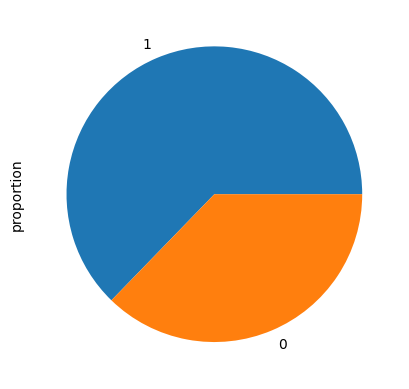

In [10]:
#transform results in dataframe
y = pd.DataFrame(y,columns=["label"])       

print(y.label.unique())       #
print(data.target_names)

'''
#checking results in dataframe
print(y.head()) 
print(y.tail()) 
'''
#checking results consistenci
print(y.label.value_counts())
porcentajes = y.label.value_counts(normalize=True)

#painting results amount
porcentajes.plot.pie()

In [11]:
#Data statistics
print(X.describe())

       mean radius  mean texture  mean perimeter    mean area  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       mean smoothness  mean compactness  mean concavity  mean concave points  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%      

array([[<Axes: title={'center': 'mean radius'}>,
        <Axes: title={'center': 'mean texture'}>,
        <Axes: title={'center': 'mean perimeter'}>,
        <Axes: title={'center': 'mean area'}>,
        <Axes: title={'center': 'mean smoothness'}>],
       [<Axes: title={'center': 'mean compactness'}>,
        <Axes: title={'center': 'mean concavity'}>,
        <Axes: title={'center': 'mean concave points'}>,
        <Axes: title={'center': 'mean symmetry'}>,
        <Axes: title={'center': 'mean fractal dimension'}>],
       [<Axes: title={'center': 'radius error'}>,
        <Axes: title={'center': 'texture error'}>,
        <Axes: title={'center': 'perimeter error'}>,
        <Axes: title={'center': 'area error'}>,
        <Axes: title={'center': 'smoothness error'}>],
       [<Axes: title={'center': 'compactness error'}>,
        <Axes: title={'center': 'concavity error'}>,
        <Axes: title={'center': 'concave points error'}>,
        <Axes: title={'center': 'symmetry error'}>

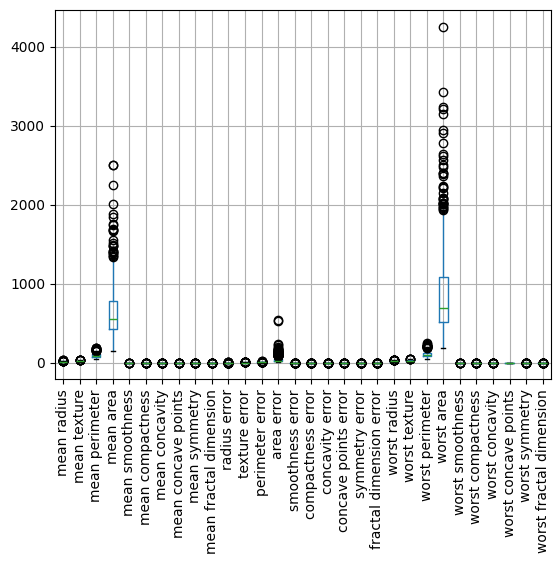

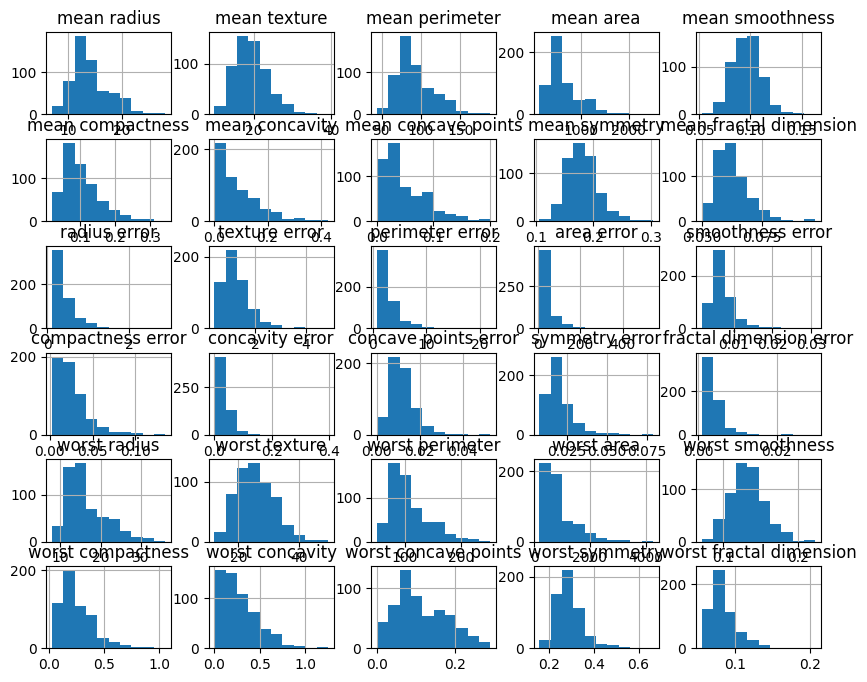

In [14]:
%matplotlib inline
#Data graph study
X.boxplot(rot=90) #rotamos 90 grados las etiquetas de variables
X.hist(layout=(6, 5), figsize=(10, 8))

In [23]:
#correlation study
data = X.join(y)     
data.corr()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
mean radius,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066,-0.730029
mean texture,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205,-0.415185
mean perimeter,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019,-0.742636
mean area,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738,-0.708984
mean smoothness,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316,-0.358560
mean compactness,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,...,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382,-0.596534
mean concavity,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,...,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930,-0.696360
mean concave points,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,...,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661,-0.776614
mean symmetry,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,...,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413,-0.330499
mean fractal dimension,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,...,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297,0.012838


In [36]:
# Getting most important correlated variables
pares_cercanos_a_1 = []


for fila in data.index:
    for columna in data.columns:        
        if fila != columna:           
            if abs(data.loc[fila, columna]) > 0.8 and abs(data.loc[fila, columna]) < 1:
                pares_cercanos_a_1.append((fila, columna))

print("Rows and columns values close to 1:")
for par in pares_cercanos_a_1:
    print(par)

Filas y columnas con valores cercanos a 1:
(0, 'texture error')
(3, 'worst compactness')
(5, 'texture error')
(11, 'texture error')
(12, 'radius error')
(21, 'texture error')
(24, 'radius error')
(24, 'texture error')
(25, 'texture error')
(26, 'texture error')
(27, 'radius error')
(29, 'texture error')
(30, 'radius error')
(35, 'texture error')
(40, 'texture error')
(42, 'radius error')
(43, 'texture error')
(46, 'texture error')
(47, 'texture error')
(51, 'texture error')
(53, 'radius error')
(54, 'texture error')
(55, 'texture error')
(67, 'texture error')
(69, 'texture error')
(71, 'texture error')
(77, 'radius error')
(78, 'radius error')
(82, 'radius error')
(91, 'texture error')
(94, 'texture error')
(105, 'texture error')
(107, 'texture error')
(107, 'perimeter error')
(108, 'worst concavity')
(109, 'texture error')
(115, 'texture error')
(116, 'texture error')
(117, 'texture error')
(123, 'texture error')
(125, 'texture error')
(130, 'texture error')
(133, 'texture error')
(13

In [37]:
#getting unique correlated variable names
nombres_columnas = [par[1] for par in pares_cercanos_a_1]

valores_unicos = list(set(nombres_columnas))

print(valores_unicos)

['worst concavity', 'texture error', 'radius error', 'perimeter error', 'worst compactness']


In [40]:
#getting a dataframe with the most important variables for training
data_for_training = X[valores_unicos]
print (data_for_training)

     worst concavity  texture error  radius error  perimeter error  \
0             0.7119         0.9053        1.0950            8.589   
1             0.2416         0.7339        0.5435            3.398   
2             0.4504         0.7869        0.7456            4.585   
3             0.6869         1.1560        0.4956            3.445   
4             0.4000         0.7813        0.7572            5.438   
..               ...            ...           ...              ...   
564           0.4107         1.2560        1.1760            7.673   
565           0.3215         2.4630        0.7655            5.203   
566           0.3403         1.0750        0.4564            3.425   
567           0.9387         1.5950        0.7260            5.772   
568           0.0000         1.4280        0.3857            2.548   

     worst compactness  
0              0.66560  
1              0.18660  
2              0.42450  
3              0.86630  
4              0.20500  
..       

In [44]:
#Part 2 ML
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC

from sklearn.model_selection import StratifiedKFold, KFold
import numpy as np

#Parameters
rd = 42
particiones = 5

#Stratified Partition
skf = StratifiedKFold(n_splits=particiones,shuffle=True,random_state=rd)

#A continuación hacemos cada subdivisión.
print("Checkin class distribution in SKF:")
for train, test in skf.split(X,y):
  X_train, X_test, y_train, y_test = X.iloc[train], X.iloc[test], y.iloc[train], y.iloc[test]

modelo.fit(X_train, y_train)

# Validamos el modelo utilizando el conjunto de prueba y obtenemos las predicciones
predicciones = modelo.predict(X_test)

# Creamos la matriz de confusión
matriz_confusion = confusion_matrix(y_test, predicciones)

# Imprimimos la matriz de confusión
print("Matriz de confusión:")
print(matriz_confusion)

Checkin class distribution in SKF:
train -  [169 286]   |   test -  [43 71]
train -  [169 286]   |   test -  [43 71]
train -  [170 285]   |   test -  [42 72]
train -  [170 285]   |   test -  [42 72]
train -  [170 286]   |   test -  [42 71]
Matriz de confusión:
[[33  9]
 [ 0 71]]


C:\Users\fcofr\anaconda3\envs\Cursso_ML\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [52]:
# model Validation
predicciones = modelo.predict(X_test)

from sklearn.metrics import classification_report

print(classification_report(y_test, predicciones, target_names=["bening", "maling"]))

              precision    recall  f1-score   support

      bening       1.00      0.79      0.88        42
      maling       0.89      1.00      0.94        71

    accuracy                           0.92       113
   macro avg       0.94      0.89      0.91       113
weighted avg       0.93      0.92      0.92       113



## Conclussion
The model shows the highest precission for bening and the highest recall for maling. The model predicts with an global accuracy (f1 value) near to 90%.
However if the models threshold needs to be optimazed, in order to reduce the False Negative ratio, some changes must be done, taking into acount that these canges would affect the True Positive ratio.